In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [175]:
data=pd.read_csv(r"C:\Users\User\Desktop\Datalar\musteriler.csv")
df=data.copy()

In [176]:
df=df.dropna()
df["Total"]=df["Quantity"]*df["UnitPrice"]
df=df.drop(df[df["Total"]<=0].index)

In [177]:
Q1=df["Total"].quantile(0.25)
Q3=df["Total"].quantile(0.75)
IQR=Q3-Q1

In [178]:
altserhed=Q1-1.5*IQR
yuxariserhed=Q3+1.5*IQR

In [179]:
df=df.drop(df[df["Total"]<altserhed].index)
df=df.drop(df[df["Total"]>yuxariserhed].index)

In [180]:
df.shape

(366643, 9)

In [181]:
df=df.reset_index(drop=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
366638,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
366639,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
366640,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
366641,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [182]:
len(df["CustomerID"].unique())

4194

In [183]:
len(df["InvoiceNo"].unique())

16806

In [184]:
df["CustomerID"]=df["CustomerID"].astype(int)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366643 entries, 0 to 366642
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    366643 non-null  object 
 1   StockCode    366643 non-null  object 
 2   Description  366643 non-null  object 
 3   Quantity     366643 non-null  int64  
 4   InvoiceDate  366643 non-null  object 
 5   UnitPrice    366643 non-null  float64
 6   CustomerID   366643 non-null  int32  
 7   Country      366643 non-null  object 
 8   Total        366643 non-null  float64
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 23.8+ MB


In [186]:
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366643 entries, 0 to 366642
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    366643 non-null  object        
 1   StockCode    366643 non-null  object        
 2   Description  366643 non-null  object        
 3   Quantity     366643 non-null  int64         
 4   InvoiceDate  366643 non-null  datetime64[ns]
 5   UnitPrice    366643 non-null  float64       
 6   CustomerID   366643 non-null  int32         
 7   Country      366643 non-null  object        
 8   Total        366643 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 23.8+ MB


In [187]:
bugun=df['InvoiceDate'].max()
bugun

Timestamp('2011-12-09 12:50:00')

In [188]:
bugun=dt.datetime(2011,12,9,12,50,0)

In [189]:
bugun

datetime.datetime(2011, 12, 9, 12, 50)

In [190]:
r=(bugun-df.groupby("CustomerID").agg({"InvoiceDate":"max"})).apply(lambda x : x.dt.days)

In [191]:
f=df.groupby(["CustomerID","InvoiceDate"]).agg({"InvoiceDate":"count"})
f=f.groupby("CustomerID").agg({"InvoiceDate":"count"})
f

,InvoiceDate
CustomerID,
12347,7
12348,4
12349,1
12350,1
12352,7
...,...
18280,1
18281,1
18282,2


In [192]:
m=df.groupby("CustomerID").agg({"Total":"sum"})
m

,Total
CustomerID,
12347,3174.62
12348,601.64
12349,1145.35
12350,334.40
12352,1505.74
...,...
18280,180.60
18281,80.82
18282,178.05


In [193]:
RFM=r.merge(f,on="CustomerID").merge(m,on="CustomerID")

In [194]:
RFM

,InvoiceDate_x,InvoiceDate_y,Total
CustomerID,,,
12347,1,7,3174.62
12348,74,4,601.64
12349,18,1,1145.35
12350,309,1,334.40
12352,35,7,1505.74
...,...,...,...
18280,277,1,180.60
18281,180,1,80.82
18282,7,2,178.05


In [195]:
RFM=RFM.reset_index()

In [196]:
RFM

,CustomerID,InvoiceDate_x,InvoiceDate_y,Total
0,12347,1,7,3174.62
1,12348,74,4,601.64
2,12349,18,1,1145.35
3,12350,309,1,334.40
4,12352,35,7,1505.74
...,...,...,...,...
4189,18280,277,1,180.60
4190,18281,180,1,80.82
4191,18282,7,2,178.05
4192,18283,3,16,2094.88


In [197]:
RFM=RFM.rename(columns={"CustomerID":"Customer","InvoiceDate_x":"Recency","InvoiceDate_y":"Frequency","Total":"Monetary"})

In [198]:
RFM

,Customer,Recency,Frequency,Monetary
0,12347,1,7,3174.62
1,12348,74,4,601.64
2,12349,18,1,1145.35
3,12350,309,1,334.40
4,12352,35,7,1505.74
...,...,...,...,...
4189,18280,277,1,180.60
4190,18281,180,1,80.82
4191,18282,7,2,178.05
4192,18283,3,16,2094.88


In [199]:
df=RFM.drop(columns="Customer",axis=1)
df

,Recency,Frequency,Monetary
0,1,7,3174.62
1,74,4,601.64
2,18,1,1145.35
3,309,1,334.40
4,35,7,1505.74
...,...,...,...
4189,277,1,180.60
4190,180,1,80.82
4191,7,2,178.05
4192,3,16,2094.88


In [200]:
scaler=MinMaxScaler()
dfnorm=scaler.fit_transform(df)

In [201]:
dfnorm=pd.DataFrame(dfnorm,columns=df.columns)
dfnorm

,Recency,Frequency,Monetary
0,0.002681,0.029851,0.035451
1,0.198391,0.014925,0.006701
2,0.048257,0.000000,0.012777
3,0.828418,0.000000,0.003715
4,0.093834,0.029851,0.016804
...,...,...,...
4189,0.742627,0.000000,0.001997
4190,0.482574,0.000000,0.000882
4191,0.018767,0.004975,0.001968
4192,0.008043,0.074627,0.023386


In [202]:
dfnorm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4194.0,0.245479,0.267357,0.0,0.045576,0.134048,0.383378,1.0
Frequency,4194.0,0.014886,0.034801,0.0,0.000000,0.004975,0.014925,1.0
Monetary,4194.0,0.011691,0.024861,0.0,0.002481,0.005537,0.013299,1.0


In [203]:
model=KMeans(random_state=0,n_clusters=7,init="k-means++")
#visualizer = KElbowVisualizer(model, k=(4,12))
#visualizer.fit(dfnorm)
#visualizer.poof()
#visualizer.elbow_value_

In [204]:
kfit=model.fit(dfnorm)
labels=kfit.labels_
labels

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 4, 1, ..., 1, 1, 4])

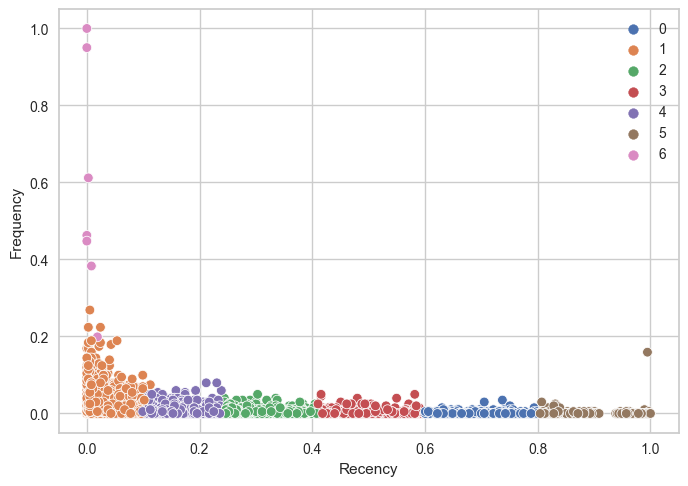

In [205]:
sns.scatterplot(x="Recency",y="Frequency",data=dfnorm,hue=labels,palette="deep");

In [206]:
RFM["Labels"]=labels

In [207]:
RFM

,Customer,Recency,Frequency,Monetary,Labels
0,12347,1,7,3174.62,1
1,12348,74,4,601.64,4
2,12349,18,1,1145.35,1
3,12350,309,1,334.40,5
4,12352,35,7,1505.74,1
...,...,...,...,...,...
4189,18280,277,1,180.60,0
4190,18281,180,1,80.82,3
4191,18282,7,2,178.05,1
4192,18283,3,16,2094.88,1


(-1.0, 7.0)

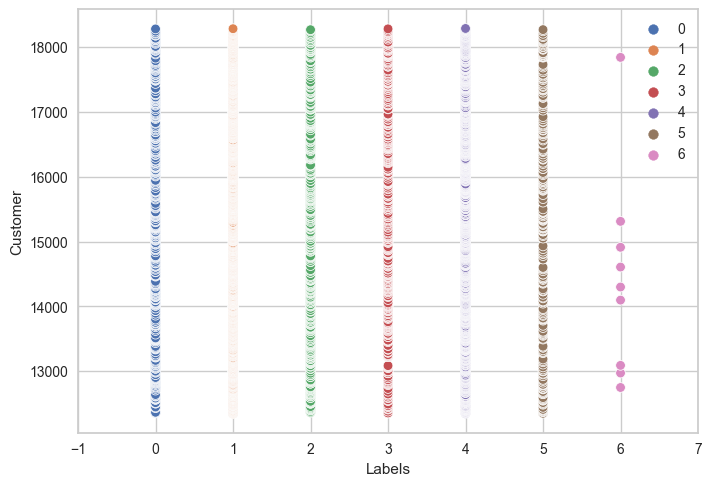

In [208]:
sns.scatterplot(x="Labels",y="Customer",data=RFM,hue=labels,palette="deep");
plt.xlim([-1,7])

In [209]:
RFM.groupby("Labels")["Customer"].count()

Labels
0     350
1    1810
2     399
3     395
4     979
5     252
6       9
Name: Customer, dtype: int64

In [210]:
RFM.groupby("Labels").mean().iloc[:,1:]

,Recency,Frequency,Monetary
Labels,,,
0,259.897143,1.297143,282.280457
1,15.327624,5.891160,1548.521973
2,118.729323,2.355890,594.730401
3,185.713924,1.946835,418.970585
4,60.405516,2.713994,755.575692
5,338.996032,1.361111,286.447024
6,1.888889,101.888889,31092.137778
